In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
import scipy.stats as st


In [1]:
!pip install fitter

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Obtaining dependency information for click<9.0.0,>=8.1.6 from https://files.pythonhosted.org/packages/00/2e/d53fa4befbf2cfa713304affc7ca780ce4fc1fd8710527771b58311a3229/click-8.1.7-py3-none-any.whl.metadata
  Obtaining dependency information for joblib<2.0.0,>=1.3.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for tqdm<5.0.0,>=4.65.1 from https://files.pythonhosted.org/packages/00/e5/f12a80907d0884e6dff9c16d0c0114d81b8cd07dc3ae54c5e962cc83037e/tqdm-4.66.1-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.3 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 6.

In [67]:
!pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 3.1 MB/s eta 0:00:00 MB/s eta 0:00:01


In [13]:
df = pd.read_excel('~/Downloads/RA data_1201 data points.xlsx')

In [14]:
df.head()

,Tender No,Tender Year,Cat Code,PO Cat,PL No,Railway Zone,Min BID Rate,Final RA Rate,Min PO Rate,Unnamed: 9,% Diff Final RA Rate-PO Rate,% Diff MinBid-Final RA Rate,Min. PO Value,# Bidder Account
0,01201874,2020,11,D,10992157,Patiala Locomotive Works,6963300.0,6619014.0,4386813.19,NaN,0.337241,0.049443,14754446.78,3
1,01202545,2020,11,D,10992169,Patiala Locomotive Works,250000.0,227989.0,200582.60,NaN,0.120209,0.088044,3453787.68,5
2,02213432,2022,11,R,25606049,Patiala Locomotive Works,335000.0,333631.0,332000.00,1631.0,0.004889,0.004087,23897360.00,2
3,10201137,2021,11,D,25607959,Eastern Railway,114975.0,114700.0,90000.00,NaN,0.215344,0.002392,9982800.00,2
4,10201137,2021,11,R,25607959,Eastern Railway,114975.0,114700.0,114700.00,0.0,0.000000,0.002392,20437246.00,2


In [15]:
df['PL No'] = df['PL No'].astype(str)

In [16]:
print(df.dtypes)

Tender No                        object
Tender Year                       int64
Cat Code                          int64
PO Cat                           object
PL No                            object
Railway Zone                     object
Min BID Rate                    float64
Final RA Rate                   float64
Min PO Rate                     float64
Unnamed: 9                      float64
% Diff Final RA Rate-PO Rate    float64
% Diff MinBid-Final RA Rate     float64
Min. PO Value                   float64
# Bidder Account                  int64
dtype: object


In [17]:
def extr(s):
    return s[:2]

In [18]:
df['PL_Cat'] = df['PL No'].apply(extr)

In [19]:
df['PL_Cat']

0       10
1       10
2       25
3       25
4       25
        ..
1196    81
1197    81
1198    81
1199    81
1200    81
Name: PL_Cat, Length: 1201, dtype: object

In [20]:
df['PL_Cat'].value_counts()

PL_Cat
33    708
29    297
38     43
31     40
30     30
45     22
56     14
40     10
75      8
25      7
81      5
35      5
47      4
76      4
10      2
36      1
77      1
Name: count, dtype: int64

In [21]:
df['PL_Cat'] = df['PL_Cat'].astype(int)

In [22]:
df_10 = df[(df['PL_Cat']>=10) & (df['PL_Cat']<20)] 


In [23]:
df_10

,Tender No,Tender Year,Cat Code,PO Cat,PL No,Railway Zone,Min BID Rate,Final RA Rate,Min PO Rate,Unnamed: 9,% Diff Final RA Rate-PO Rate,% Diff MinBid-Final RA Rate,Min. PO Value,# Bidder Account,PL_Cat
0,01201874,2020,11,D,10992157,Patiala Locomotive Works,6963300.0,6619014.0,4386813.19,NaN,0.337241,0.049443,14754446.78,3,10
1,01202545,2020,11,D,10992169,Patiala Locomotive Works,250000.0,227989.0,200582.60,NaN,0.120209,0.088044,3453787.68,5,10


In [24]:
def custom_calc(x):
    return (((x[0] - x[1]) / x[0]) * 100).round(6)


In [25]:
df_10['Percent_Change'] = df[['Min BID Rate', 'Final RA Rate', 'Min PO Rate']].apply(custom_calc, axis=1)

/tmp/ipykernel_17042/1335430945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_10['Percent_Change'] = df[['Min BID Rate', 'Final RA Rate', 'Min PO Rate']].apply(custom_calc, axis=1)


In [26]:
df_10

,Tender No,Tender Year,Cat Code,PO Cat,PL No,Railway Zone,Min BID Rate,Final RA Rate,Min PO Rate,Unnamed: 9,% Diff Final RA Rate-PO Rate,% Diff MinBid-Final RA Rate,Min. PO Value,# Bidder Account,PL_Cat,Percent_Change
0,01201874,2020,11,D,10992157,Patiala Locomotive Works,6963300.0,6619014.0,4386813.19,NaN,0.337241,0.049443,14754446.78,3,10,4.944294
1,01202545,2020,11,D,10992169,Patiala Locomotive Works,250000.0,227989.0,200582.60,NaN,0.120209,0.088044,3453787.68,5,10,8.804400


In [27]:
df_10['PL_Cat'].value_counts()

PL_Cat
10    2
Name: count, dtype: int64

array([[<Axes: title={'center': 'Percent_Change'}>]], dtype=object)

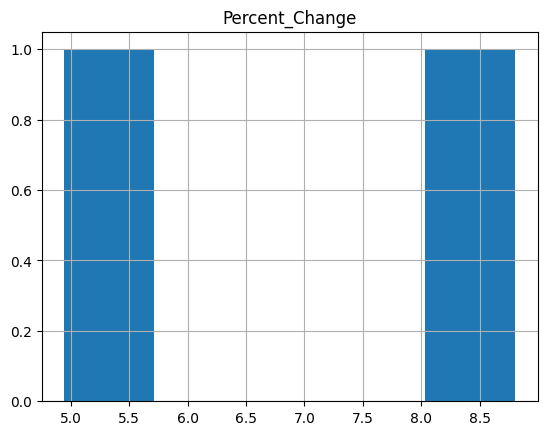

In [28]:
df_10.hist(column='Percent_Change',bins=5)

## For Category 20

In [29]:
df_20 = df[(df['PL_Cat']>=20) & (df['PL_Cat']<30)] 

In [30]:
df_20

,Tender No,Tender Year,Cat Code,PO Cat,PL No,Railway Zone,Min BID Rate,Final RA Rate,Min PO Rate,Unnamed: 9,% Diff Final RA Rate-PO Rate,% Diff MinBid-Final RA Rate,Min. PO Value,# Bidder Account,PL_Cat
2,02213432,2022,11,R,25606049,Patiala Locomotive Works,335000.0,333631.0,332000.0,1631.0,0.004889,0.004087,2.389736e+07,2,25
3,10201137,2021,11,D,25607959,Eastern Railway,114975.0,114700.0,90000.0,NaN,0.215344,0.002392,9.982800e+06,2,25
4,10201137,2021,11,R,25607959,Eastern Railway,114975.0,114700.0,114700.0,0.0,0.000000,0.002392,2.043725e+07,2,25
5,02214320,2022,11,R,25940200,Patiala Locomotive Works,920000.0,920000.0,914480.0,5520.0,0.006000,0.000000,1.942356e+08,1,25
6,02214320,2022,13,R,25940200,Patiala Locomotive Works,930000.0,915000.0,914480.0,520.0,0.000568,0.016129,1.942356e+08,1,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,91200950,2020,13,D,29941362,CLW,44650.0,44605.0,44605.0,NaN,0.000000,0.001008,7.631916e+06,1,29
302,91210950,2021,11,D,29941362,CLW,80000.0,79200.0,53900.0,NaN,0.319444,0.010000,3.084697e+07,4,29
303,91210950,2021,11,R,29941362,CLW,80000.0,79200.0,79200.0,0.0,0.000000,0.010000,2.233598e+07,4,29
304,02212706,2021,11,D,29942007,Patiala Locomotive Works,2570000.0,2554610.5,1396202.0,NaN,0.453458,0.005988,2.971476e+07,3,29


In [31]:
df_20['Percent_Change'] = df[['Min BID Rate', 'Final RA Rate', 'Min PO Rate']].apply(custom_calc, axis=1)

/tmp/ipykernel_17042/3605028952.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_20['Percent_Change'] = df[['Min BID Rate', 'Final RA Rate', 'Min PO Rate']].apply(custom_calc, axis=1)


In [32]:
df_20

,Tender No,Tender Year,Cat Code,PO Cat,PL No,Railway Zone,Min BID Rate,Final RA Rate,Min PO Rate,Unnamed: 9,% Diff Final RA Rate-PO Rate,% Diff MinBid-Final RA Rate,Min. PO Value,# Bidder Account,PL_Cat,Percent_Change
2,02213432,2022,11,R,25606049,Patiala Locomotive Works,335000.0,333631.0,332000.0,1631.0,0.004889,0.004087,2.389736e+07,2,25,0.408657
3,10201137,2021,11,D,25607959,Eastern Railway,114975.0,114700.0,90000.0,NaN,0.215344,0.002392,9.982800e+06,2,25,0.239182
4,10201137,2021,11,R,25607959,Eastern Railway,114975.0,114700.0,114700.0,0.0,0.000000,0.002392,2.043725e+07,2,25,0.239182
5,02214320,2022,11,R,25940200,Patiala Locomotive Works,920000.0,920000.0,914480.0,5520.0,0.006000,0.000000,1.942356e+08,1,25,0.000000
6,02214320,2022,13,R,25940200,Patiala Locomotive Works,930000.0,915000.0,914480.0,520.0,0.000568,0.016129,1.942356e+08,1,25,1.612903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,91200950,2020,13,D,29941362,CLW,44650.0,44605.0,44605.0,NaN,0.000000,0.001008,7.631916e+06,1,29,0.100784
302,91210950,2021,11,D,29941362,CLW,80000.0,79200.0,53900.0,NaN,0.319444,0.010000,3.084697e+07,4,29,1.000000
303,91210950,2021,11,R,29941362,CLW,80000.0,79200.0,79200.0,0.0,0.000000,0.010000,2.233598e+07,4,29,1.000000
304,02212706,2021,11,D,29942007,Patiala Locomotive Works,2570000.0,2554610.5,1396202.0,NaN,0.453458,0.005988,2.971476e+07,3,29,0.598813


<Axes: ylabel='Density'>

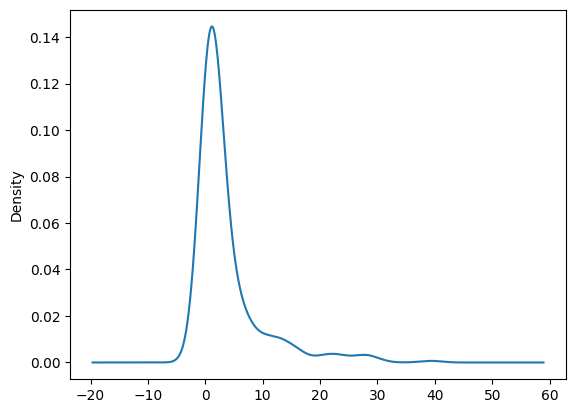

In [33]:
df_20['Percent_Change'].plot(kind='kde')

In [39]:
df_20['PL_Cat'].value_counts()

PL_Cat
29    297
25      7
Name: count, dtype: int64

In [40]:
ar_29 = df_20[df_20['PL_Cat'] == 29]
ar_25 = df_20[df_20['PL_Cat'] == 25]

In [41]:
st.kruskal(ar_29.Percent_Change,ar_25.Percent_Change)

KruskalResult(statistic=11.279563993921244, pvalue=0.000783649591216946)

## since p value < alpha (0.05), Null Hypothesis is rejected. This implies that median percent change across categories is not the same.

In [43]:
ind_20 = ['PL_29','PL_25']
median_20 = pd.DataFrame([ar_29.Percent_Change.median(),ar_25.Percent_Change.median()], index=ind_20)
median_20

,0
PL_29,1.515225
PL_25,0.239182


array([[<Axes: title={'center': 'Percent_Change'}>]], dtype=object)

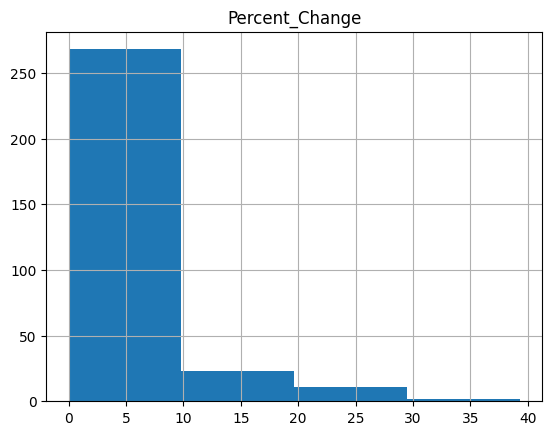

In [44]:
df_20.hist(column='Percent_Change', bins=4)

In [46]:
def calc_krus(arr1, arr2):
      result = st.kruskal(arr1, arr2)
      return result

In [47]:
calc_krus(ar_29.Percent_Change,ar_25.Percent_Change)

KruskalResult(statistic=11.279563993921244, pvalue=0.000783649591216946)

## KW Test between Category 10 and Category 20

In [50]:
ar_20_29 = df_20['Percent_Change']
ar_10 =df_10['Percent_Change']

In [51]:
calc_krus(ar_10, ar_20_29)

KruskalResult(statistic=2.419763635139304, pvalue=0.11981300737940304)

### since p value > 0.05 , Null Hypothesis accepted 

In [66]:
calc_krus(ar_10, ar_30_39)

KruskalResult(statistic=0.6092262565261373, pvalue=0.4350792870367852)

### since p value > 0.05 , Null Hypothesis accepted

## For Category 30

In [54]:
df_30 = df[(df['PL_Cat']>=30) & (df['PL_Cat']<40)] 

In [55]:
df_30

,Tender No,Tender Year,Cat Code,PO Cat,PL No,Railway Zone,Min BID Rate,Final RA Rate,Min PO Rate,Unnamed: 9,% Diff Final RA Rate-PO Rate,% Diff MinBid-Final RA Rate,Min. PO Value,# Bidder Account,PL_Cat
306,04210119,2021,11,R,30056068,Southern Railway,5199.0,5172.00,5172.00,0.0,0.000000,0.005193,10073400.96,3,30
307,03192083,2020,11,R,30057309,ICF,424000.0,327479.25,327479.25,0.0,0.000000,0.227643,47680978.80,4,30
308,03201766,2021,11,R,30057309,ICF,421000.0,412500.00,387849.00,24651.0,0.059760,0.020190,10859772.00,3,30
309,03211450,2021,11,R,30057309,ICF,390000.0,387849.00,387849.00,0.0,0.000000,0.005515,12814530.96,3,30
310,02190192,2019,11,D,30107660,ICF,171720.0,161901.00,134684.00,NaN,0.168109,0.057180,12056247.00,2,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128,03211373,2021,13,R,38134305,South East Central Railway,7350.0,5585.00,5194.80,390.2,0.069866,0.240136,95417463.02,1,38
1129,44210242,2021,11,R,38134305,Southern Railway,6990.0,6243.75,6243.75,0.0,0.000000,0.106760,27978111.00,1,38
1130,21201300,2021,11,R,38407620,Eastern Railway,109219.0,105933.21,105933.21,0.0,0.000000,0.030084,16610327.33,4,38
1131,03212304,2021,11,D,38452534,South East Central Railway,8700.0,7849.10,7370.00,NaN,0.061039,0.097805,6708193.80,1,38


In [56]:
df_30['Percent_Change'] = df[['Min BID Rate', 'Final RA Rate', 'Min PO Rate']].apply(custom_calc, axis=1)

/tmp/ipykernel_17042/824696920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_30['Percent_Change'] = df[['Min BID Rate', 'Final RA Rate', 'Min PO Rate']].apply(custom_calc, axis=1)


In [57]:
df_30

,Tender No,Tender Year,Cat Code,PO Cat,PL No,Railway Zone,Min BID Rate,Final RA Rate,Min PO Rate,Unnamed: 9,% Diff Final RA Rate-PO Rate,% Diff MinBid-Final RA Rate,Min. PO Value,# Bidder Account,PL_Cat,Percent_Change
306,04210119,2021,11,R,30056068,Southern Railway,5199.0,5172.00,5172.00,0.0,0.000000,0.005193,10073400.96,3,30,0.519331
307,03192083,2020,11,R,30057309,ICF,424000.0,327479.25,327479.25,0.0,0.000000,0.227643,47680978.80,4,30,22.764328
308,03201766,2021,11,R,30057309,ICF,421000.0,412500.00,387849.00,24651.0,0.059760,0.020190,10859772.00,3,30,2.019002
309,03211450,2021,11,R,30057309,ICF,390000.0,387849.00,387849.00,0.0,0.000000,0.005515,12814530.96,3,30,0.551538
310,02190192,2019,11,D,30107660,ICF,171720.0,161901.00,134684.00,NaN,0.168109,0.057180,12056247.00,2,30,5.718029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128,03211373,2021,13,R,38134305,South East Central Railway,7350.0,5585.00,5194.80,390.2,0.069866,0.240136,95417463.02,1,38,24.013605
1129,44210242,2021,11,R,38134305,Southern Railway,6990.0,6243.75,6243.75,0.0,0.000000,0.106760,27978111.00,1,38,10.675966
1130,21201300,2021,11,R,38407620,Eastern Railway,109219.0,105933.21,105933.21,0.0,0.000000,0.030084,16610327.33,4,38,3.008442
1131,03212304,2021,11,D,38452534,South East Central Railway,8700.0,7849.10,7370.00,NaN,0.061039,0.097805,6708193.80,1,38,9.780460


In [58]:
df_30['PL_Cat'].value_counts()

PL_Cat
33    708
38     43
31     40
30     30
35      5
36      1
Name: count, dtype: int64

In [59]:
ar_33 = df_30[df_30['PL_Cat'] == 33]
ar_38 = df_30[df_30['PL_Cat'] == 38]
ar_31 = df_30[df_30['PL_Cat'] == 31]
ar_30 = df_30[df_30['PL_Cat'] == 30]
ar_35 = df_30[df_30['PL_Cat'] == 35]
ar_36 = df_30[df_30['PL_Cat'] == 36]

In [61]:
st.kruskal(ar_33.Percent_Change,ar_38.Percent_Change,ar_31.Percent_Change, ar_30.Percent_Change)

KruskalResult(statistic=0.32689654211545227, pvalue=0.9548930825097625)

In [62]:
st.kruskal(ar_33.Percent_Change,ar_38.Percent_Change,ar_31.Percent_Change, ar_30.Percent_Change,ar_35.Percent_Change, ar_36.Percent_Change)

KruskalResult(statistic=6.6387786750062325, pvalue=0.24892020042954846)

In [63]:
st.kruskal(ar_35.Percent_Change, ar_36.Percent_Change)

KruskalResult(statistic=2.272727272727272, pvalue=0.13166801602281455)

In [64]:
ind = ['PL_33','PL_38','PL_31','PL_30','PL_35','PL_36']
median_30 = pd.DataFrame([ar_33.Percent_Change.median(),ar_38.Percent_Change.median(),ar_31.Percent_Change.median(),ar_30.Percent_Change.median(),ar_35.Percent_Change.median(),ar_36.Percent_Change.median()], index=ind)
median_30


,0
PL_33,3.445557
PL_38,3.235294
PL_31,3.703448
PL_30,3.413257
PL_35,12.045780
PL_36,4.273792


In [65]:
ar_30_39 = df_30['Percent_Change']

In [67]:
calc_krus(ar_20_29, ar_30_39)

KruskalResult(statistic=59.92478685716444, pvalue=9.85524442198461e-15)

### since p value < 0.05 , Null hypothesis is rejected.

array([[<Axes: title={'center': 'Percent_Change'}>]], dtype=object)

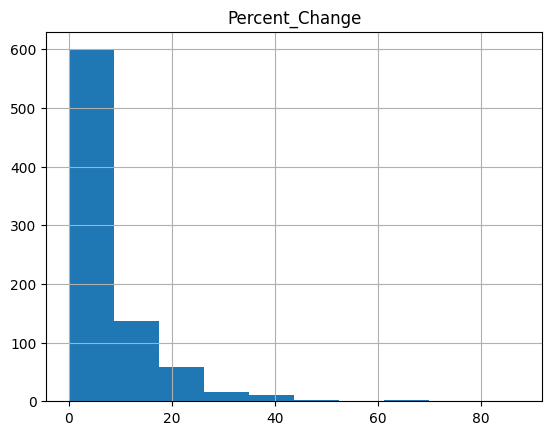

In [70]:
df_30.hist(column='Percent_Change')

# For Category 40

In [73]:
df_40 = df[(df['PL_Cat']>=40) & (df['PL_Cat']<50)] 

In [74]:
df_40['Percent_Change'] = df[['Min BID Rate', 'Final RA Rate', 'Min PO Rate']].apply(custom_calc, axis=1)

/tmp/ipykernel_17042/537519879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_40['Percent_Change'] = df[['Min BID Rate', 'Final RA Rate', 'Min PO Rate']].apply(custom_calc, axis=1)


array([[<Axes: title={'center': 'Percent_Change'}>]], dtype=object)

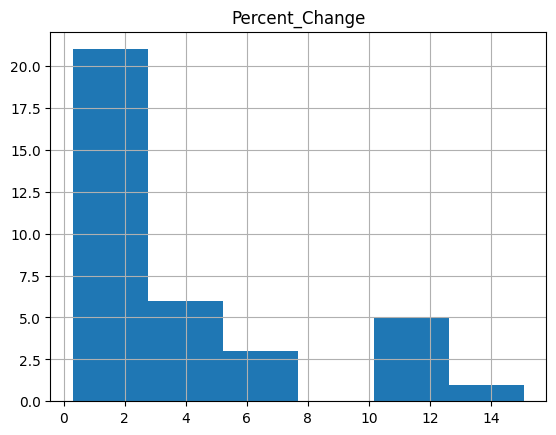

In [75]:
df_40.hist(column='Percent_Change',bins=6)

In [76]:
df_40['PL_Cat'].value_counts()

PL_Cat
45    22
40    10
47     4
Name: count, dtype: int64

In [77]:
ar_45 = df_40[df_40['PL_Cat'] == 45]
ar_40 = df_40[df_40['PL_Cat'] == 40]
ar_47 = df_40[df_40['PL_Cat'] == 47]

In [79]:
ind_40 = ['PL_45','PL_40','PL_47']
median_40 = pd.DataFrame([ar_45.Percent_Change.median(),ar_40.Percent_Change.median(),ar_47.Percent_Change.median()], index=ind_40)
median_40

,0
PL_45,0.993319
PL_40,3.197548
PL_47,9.449447


In [80]:
st.kruskal(ar_45.Percent_Change,ar_40.Percent_Change, ar_47.Percent_Change)

KruskalResult(statistic=11.633343478566252, pvalue=0.002977498563212762)

## since p value < alpha (0.05), Null Hypothesis is rejected. This implies that median percent change across categories is not the same

<Axes: ylabel='Density'>

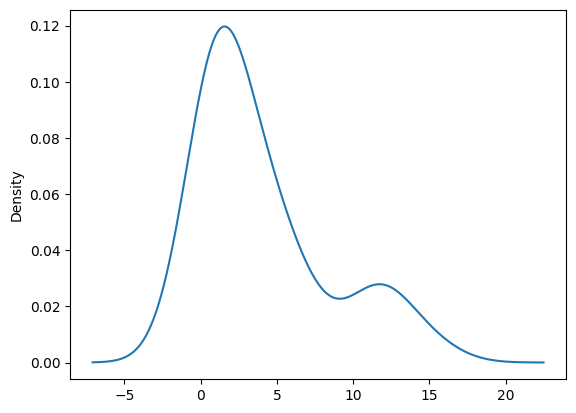

In [81]:
df_40['Percent_Change'].plot(kind='kde')

In [83]:
ar_40_49 = df_40['Percent_Change']

In [84]:
calc_krus(ar_10, ar_40_49)

KruskalResult(statistic=1.5434105698473548, pvalue=0.21411086176204316)

### since p value > 0.05, Null Hypothesis is accepted

In [85]:
calc_krus(ar_20_29, ar_40_49)

KruskalResult(statistic=2.9635722912227593, pvalue=0.08515960341770162)

### since p value > 0.05, Null Hypothesis is accepted

In [86]:
calc_krus(ar_30_39, ar_40_49)

KruskalResult(statistic=2.547884231976419, pvalue=0.11044206477116411)

## For Category 50

In [92]:
df_50_90 = df[df['PL_Cat']>=50] 

In [94]:
df_50_90.shape

(32, 15)

In [95]:
df_50_90['Percent_Change'] = df[['Min BID Rate', 'Final RA Rate', 'Min PO Rate']].apply(custom_calc, axis=1)

/tmp/ipykernel_17042/2545784608.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_50_90['Percent_Change'] = df[['Min BID Rate', 'Final RA Rate', 'Min PO Rate']].apply(custom_calc, axis=1)


In [96]:
ar_50_90 = df_50_90['Percent_Change']

In [97]:
calc_krus(ar_10, ar_50_90)

KruskalResult(statistic=1.2122099723417434, pvalue=0.2708948837854325)

## since p value > 0.05, Null Hypothesis is accepted.

In [98]:
calc_krus(ar_20_29, ar_50_90)

KruskalResult(statistic=6.215011887550033, pvalue=0.012667150166006603)

## since p value < 0.05 , Null Hypothesis is rejected 

In [99]:
calc_krus(ar_30_39, ar_50_90)

KruskalResult(statistic=0.43662946443945544, pvalue=0.5087537717474351)

## since p value > 0.05 , Null Hypothesis is accepted

In [100]:
calc_krus(ar_40_49, ar_50_90)

KruskalResult(statistic=0.7403136188736039, pvalue=0.38956043333226775)

## since p value > 0.05 , Null Hypothesis is accepted

In [102]:
col_list = ['10_19','20_29','30_39','40_49','50_90']

In [103]:
index_list = ['10_19','20_29','30_39','40_49','50_90']

In [104]:
new_df = pd.DataFrame(columns=col_list, index=index_list)

In [105]:
new_df

,10_19,20_29,30_39,40_49,50_90
10_19,NaN,NaN,NaN,NaN,NaN
20_29,NaN,NaN,NaN,NaN,NaN
30_39,NaN,NaN,NaN,NaN,NaN
40_49,NaN,NaN,NaN,NaN,NaN
50_90,NaN,NaN,NaN,NaN,NaN


In [143]:
calc_krus(ar_50_90, ar_50_90)

KruskalResult(statistic=0.0, pvalue=1.0)

In [113]:
calc_krus(ar_50_90, ar_10)

KruskalResult(statistic=1.2122099723417434, pvalue=0.2708948837854325)

In [144]:
col1 = [1, 0.11, 0.43, 0.21, 0.27]
col2 = [0.11, 1, 9.85e-15, 0.08, 0.01]
col3 = [0.43, 9.85e-15, 1, 0.11, 0.50]
col4 = [0.21, 0.08, 0.11, 1, 0.38]
col5 = [0.27, 0.01, 0.5, 0.38, 1]


In [146]:
new_df['10_19'] = col1
new_df['20_29'] = col2
new_df['30_39'] = col3
new_df['40_49'] = col4
new_df['50_90'] = col5

In [147]:
new_df

,10_19,20_29,30_39,40_49,50_90
10_19,1.00,1.100000e-01,4.300000e-01,0.21,0.27
20_29,0.11,1.000000e+00,9.850000e-15,0.08,0.01
30_39,0.43,9.850000e-15,1.000000e+00,0.11,0.50
40_49,0.21,8.000000e-02,1.100000e-01,1.00,0.38
50_90,0.27,1.000000e-02,5.000000e-01,0.38,1.00


In [148]:
results = new_df.copy(deep=True)

In [149]:
results

,10_19,20_29,30_39,40_49,50_90
10_19,1.00,1.100000e-01,4.300000e-01,0.21,0.27
20_29,0.11,1.000000e+00,9.850000e-15,0.08,0.01
30_39,0.43,9.850000e-15,1.000000e+00,0.11,0.50
40_49,0.21,8.000000e-02,1.100000e-01,1.00,0.38
50_90,0.27,1.000000e-02,5.000000e-01,0.38,1.00


In [157]:
newresult = results.applymap(lambda val: 'Yes' if val > 0.05 else "No")

In [158]:
newresult

,10_19,20_29,30_39,40_49,50_90
10_19,Yes,Yes,Yes,Yes,Yes
20_29,Yes,Yes,No,Yes,No
30_39,Yes,No,Yes,Yes,Yes
40_49,Yes,Yes,Yes,Yes,Yes
50_90,Yes,No,Yes,Yes,Yes


### Null Hypothesis is rejected for these two categories
    - For Category 30_39 and 20_29   
    - For Category 20_29 and 50_90 

### For rest of the combinations Null Hypothesis is accepted


## For Categories 50 - 90 Individually

In [52]:
df_50 = df[(df['PL_Cat']>=50) & (df['PL_Cat']<60)] 

In [53]:
df_50['Percent_Change'] = df[['Min BID Rate', 'Final RA Rate', 'Min PO Rate']].apply(custom_calc, axis=1)

/tmp/ipykernel_10741/958263476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_50['Percent_Change'] = df[['Min BID Rate', 'Final RA Rate', 'Min PO Rate']].apply(custom_calc, axis=1)


<Axes: ylabel='Density'>

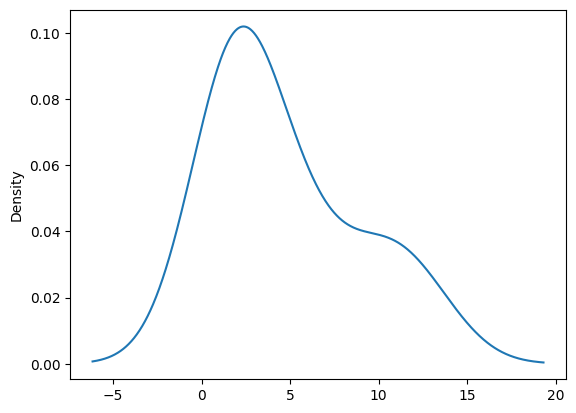

In [54]:
df_50['Percent_Change'].plot(kind='kde')

In [56]:
df_50

,Tender No,Tender Year,Cat Code,PO Cat,PL No,Railway Zone,Min BID Rate,Final RA Rate,Min PO Rate,Unnamed: 9,% Diff Final RA Rate-PO Rate,% Diff MinBid-Final RA Rate,Min. PO Value,# Bidder Account,PL_Cat,Percent_Change
1169,56191098,2019,11,R,56119008,South Western Railway,262000.0,234250.00,208732.00,25518.0,0.108935,0.105916,1290802.00,2,56,10.591603
1170,08195298,2019,11,R,56119550,Northern Railway,245500.0,240484.00,233200.00,7284.0,0.030289,0.020432,38992392.00,6,56,2.043177
1171,50185172B,2019,11,R,56119550,West Central Railway,247500.0,235000.00,225000.00,10000.0,0.042553,0.050505,3982500.00,3,56,5.050505
1172,50185172B,2019,13,R,56119550,West Central Railway,255446.0,229000.00,225000.00,4000.0,0.017467,0.103529,3982500.00,1,56,10.352873
1173,29201064,2020,11,R,56300270,North East Railway,28786.0,25062.00,25062.00,0.0,0.000000,0.129368,27059441.40,1,56,12.936844
1174,08205413,2021,11,D,56468039,Northern Railway,7600.0,7432.00,7300.00,NaN,0.017761,0.022105,8321124.00,4,56,2.210526
1175,08201517,2021,11,D,56468040,Northern Railway,8610.0,8400.00,7749.00,NaN,0.077500,0.024390,3675815.64,4,56,2.439024
1176,08201517,2021,13,D,56468040,Northern Railway,7765.0,7749.00,7749.00,NaN,0.000000,0.002061,3675815.64,2,56,0.206053
1177,29211025,2021,11,D,56488117,North East Railway,13699.0,13400.50,12500.00,NaN,0.067199,0.021790,10836000.00,2,56,2.178991
1178,29211025,2021,11,R,56488117,North East Railway,13699.0,13400.50,13400.50,0.0,0.000000,0.021790,20383125.28,2,56,2.178991


In [55]:
df_50['PL_Cat'].value_counts()

PL_Cat
56    14
Name: count, dtype: int64

## For Category 60

In [61]:
df_60 = df[(df['PL_Cat']>=60) & (df['PL_Cat']<70)] 

In [65]:
df_60['Percent_Change'] = df[['Min BID Rate', 'Final RA Rate', 'Min PO Rate']].apply(custom_calc, axis=1)

/tmp/ipykernel_10741/1433501733.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_60['Percent_Change'] = df[['Min BID Rate', 'Final RA Rate', 'Min PO Rate']].apply(custom_calc, axis=1)


In [64]:
df_60['PL_Cat'].value_counts()

Series([], Name: count, dtype: int64)

## For Category 70

In [68]:
df_70 = df[(df['PL_Cat']>=70) & (df['PL_Cat']<80)] 

In [69]:
df_70['Percent_Change'] = df[['Min BID Rate', 'Final RA Rate', 'Min PO Rate']].apply(custom_calc, axis=1)

/tmp/ipykernel_10741/2578725714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_70['Percent_Change'] = df[['Min BID Rate', 'Final RA Rate', 'Min PO Rate']].apply(custom_calc, axis=1)


<Axes: ylabel='Density'>

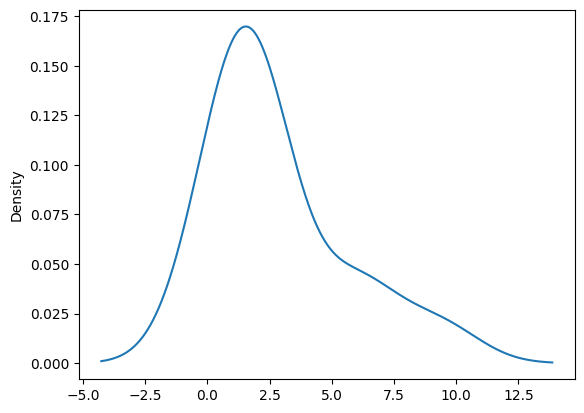

In [70]:
df_70['Percent_Change'].plot(kind='kde')

In [71]:
df_70['PL_Cat'].value_counts()

PL_Cat
75    8
76    4
77    1
Name: count, dtype: int64

In [72]:
ar_75 = df_70[df_70['PL_Cat'] == 75]
ar_76 = df_70[df_70['PL_Cat'] == 76]
ar_77 = df_70[df_70['PL_Cat'] == 77]

In [73]:
ind_70 = ['PL_75','PL_76','PL_77']
median_70 = pd.DataFrame([ar_75.Percent_Change.median(),ar_76.Percent_Change.median(),ar_77.Percent_Change.median()], index=ind_70)
median_70

,0
PL_75,1.799163
PL_76,6.072874
PL_77,0.425083


In [74]:
st.kruskal(ar_75.Percent_Change,ar_76.Percent_Change, ar_77.Percent_Change)

KruskalResult(statistic=3.4573170731707292, pvalue=0.1775223901049724)

## For Category 80

In [77]:
df_80 = df[(df['PL_Cat']>=80) & (df['PL_Cat']<90)] 

In [78]:
df_80['Percent_Change'] = df[['Min BID Rate', 'Final RA Rate', 'Min PO Rate']].apply(custom_calc, axis=1)

/tmp/ipykernel_10741/23554464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_80['Percent_Change'] = df[['Min BID Rate', 'Final RA Rate', 'Min PO Rate']].apply(custom_calc, axis=1)


<Axes: ylabel='Density'>

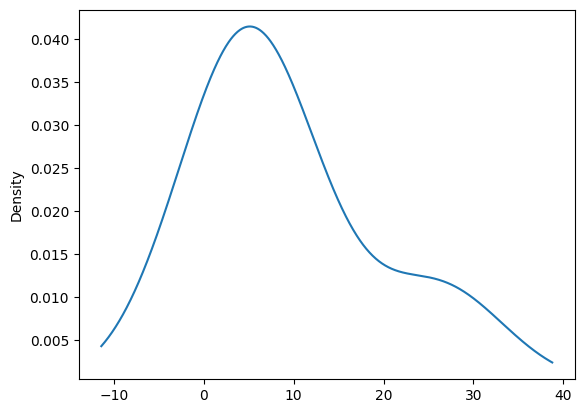

In [79]:
df_80['Percent_Change'].plot(kind='kde')

In [80]:
df_80

,Tender No,Tender Year,Cat Code,PO Cat,PL No,Railway Zone,Min BID Rate,Final RA Rate,Min PO Rate,Unnamed: 9,% Diff Final RA Rate-PO Rate,% Diff MinBid-Final RA Rate,Min. PO Value,# Bidder Account,PL_Cat,Percent_Change
1196,05191176,2019,11,D,81040015,Eastern Railway,213.0,205.00,154.00,NaN,0.248780,0.037559,3232752.46,3,81,3.755869
1197,05191176,2019,13,D,81040015,Eastern Railway,165.0,154.00,154.00,NaN,0.000000,0.066667,3232752.46,2,81,6.666667
1198,05201176A,2020,11,D,81040015,Eastern Railway,264.0,261.00,229.02,NaN,0.122529,0.011364,8041990.12,3,81,1.136364
1199,05201176A,2020,13,D,81040015,Eastern Railway,250.0,229.02,229.02,NaN,0.000000,0.083920,8041990.12,3,81,8.392000
1200,07201039,2020,11,R,81040118,MCF RBL,54.9,40.50,40.50,0.0,0.000000,0.262295,28913475.69,1,81,26.229508


In [81]:
df_80['PL_Cat'].value_counts()

PL_Cat
81    5
Name: count, dtype: int64

array([[<Axes: title={'center': 'Percent_Change'}>]], dtype=object)

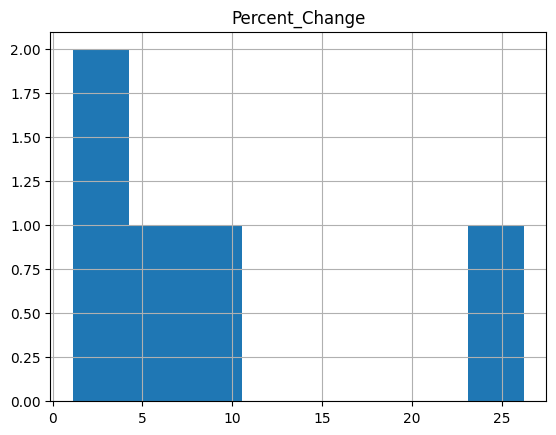

In [82]:
df_80.hist(column='Percent_Change', bins=8)

# Fitting Distributions to data

## For Category 20

In [89]:
dec_20 = df_20["Percent_Change"].values

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.049475,1107.506736,1118.657819,inf,0.059579,2.217297e-01
beta,0.101989,1131.996043,1146.864154,inf,0.130700,5.474750e-05
expon,0.143501,1313.998474,1321.432529,inf,0.215266,7.617235e-13
norm,0.428546,1625.584230,1633.018285,inf,0.287651,9.190547e-23


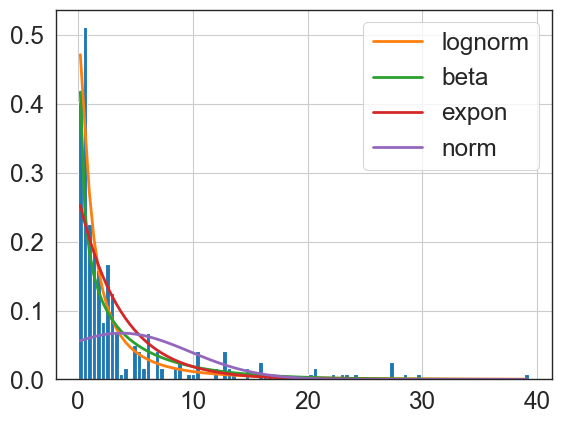

In [90]:
f = Fitter(dec_20,
           distributions=['expon',
                          'lognorm',
                          "beta",
                          "norm"])
f.fit()
f.summary()

In [91]:
f.get_best(method = 'sumsquare_error')

{'lognorm': {'s': 1.3590300431250237,
  'loc': -0.04839124947195496,
  'scale': 1.5685518292984855}}

## For Category 10

In [93]:
dec_10 = df_10["Percent_Change"].values

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
exponpow,244.511969,796.655120,792.734561,inf,0.495085,0.519467
chi2,281.472219,415.485608,411.565049,inf,0.500000,0.500000
powerlaw,285.533229,666.020505,662.099946,inf,0.500000,0.500000
lognorm,314.914117,901.741488,897.820929,inf,0.485436,0.556560
expon,327.025237,335.509493,332.895787,inf,0.500000,0.500000


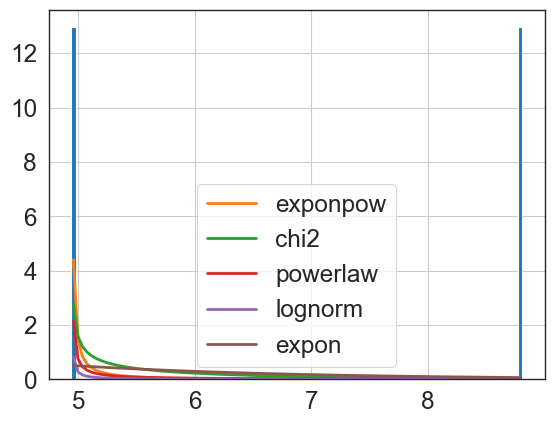

In [94]:
f_10 = Fitter(dec_10,
           distributions= get_common_distributions())
f_10.fit()
f_10.summary()

## For Category 30

In [95]:
dec_30 = df_30["Percent_Change"].values

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.004128,1298.355035,1312.508449,inf,0.057173,8.617884e-03
chi2,0.009733,1607.709749,1621.863163,inf,0.095466,5.189264e-07
expon,0.016085,1660.725161,1670.160770,inf,0.140251,1.180248e-14
exponpow,0.024001,1146.980683,1161.134097,inf,0.229010,1.316255e-38
cauchy,0.035868,1422.448532,1431.884142,inf,0.249476,7.813965e-46


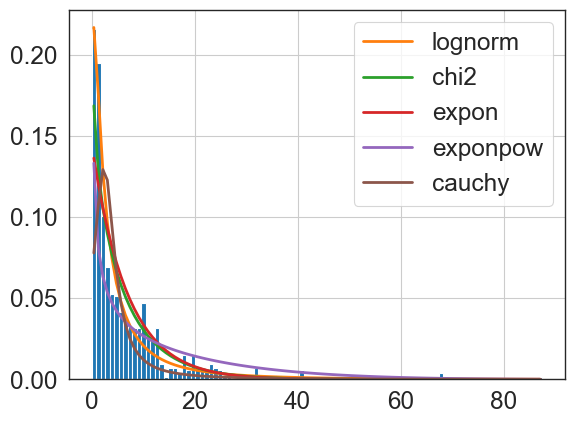

In [96]:
f_30 = Fitter(dec_30,
           distributions= get_common_distributions())
f_30.fit()
f_30.summary()

## For Category 40

In [99]:
dec_40 = df_40["Percent_Change"].values

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,1.410443,714.645901,719.396458,inf,0.106446,0.770042
gamma,1.468150,736.983292,741.733848,inf,0.148478,0.368873
chi2,1.470849,696.164488,700.915045,inf,0.120024,0.634061
exponpow,1.511595,665.331716,670.082273,inf,0.111187,0.723539
expon,1.600504,665.115934,668.282972,inf,0.181619,0.164145


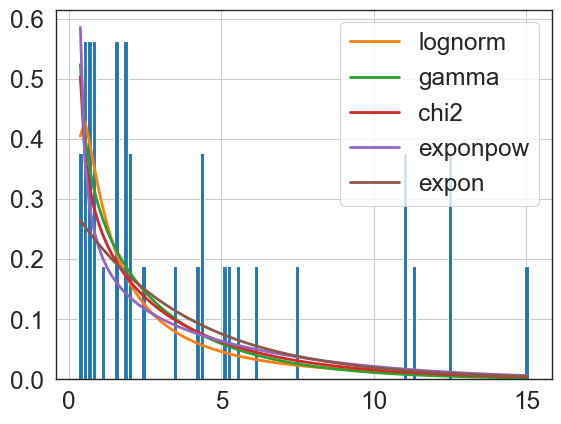

In [100]:
f_40 = Fitter(dec_40,
           distributions= get_common_distributions())
f_40.fit()
f_40.summary()

## For Category 50

In [102]:
dec_50 = df_50["Percent_Change"].values

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,5.916477,731.970340,733.248455,inf,0.287257,0.162291
exponpow,6.077627,578.201253,580.118425,inf,0.197789,0.576895
expon,6.097888,587.497267,588.775381,inf,0.191592,0.616193
lognorm,6.099845,599.789040,601.706212,inf,0.204809,0.533345
gamma,6.133706,611.458953,613.376125,inf,0.268365,0.221761


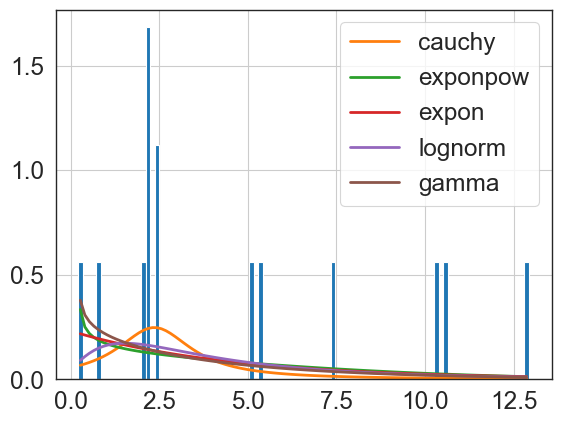

In [103]:
f_50 = Fitter(dec_50,
           distributions= get_common_distributions())
f_50.fit()
f_50.summary()

## For Category 60

In [104]:
dec_60 = df_60["Percent_Change"].values

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.002784,1337.101983,1352.374713,inf,0.048477,6.833650e-03
chi2,0.010115,1487.446942,1502.719672,inf,0.085077,5.186384e-08
exponpow,0.023394,1164.164070,1179.436800,inf,0.175560,7.583688e-33
expon,0.023476,1831.754143,1841.935963,inf,0.158621,7.308410e-27
gamma,0.026774,3957.977923,3973.250652,inf,0.572197,0.000000e+00


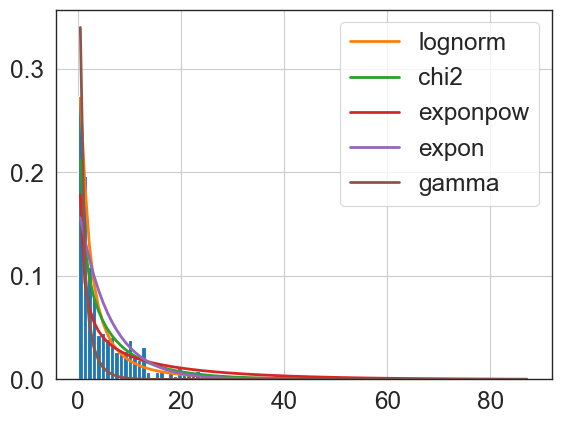

In [105]:
f_60 = Fitter(dec_60,
           distributions= get_common_distributions())
f_60.fit()
f_60.summary()

## For Category 70

In [109]:
dec_70 = df_70["Percent_Change"].values

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,28.820694,739.145802,740.275700,inf,0.285351,0.197837
gamma,29.925377,614.116237,615.811085,inf,0.375354,0.037421
chi2,29.937113,583.155538,584.850386,inf,0.300580,0.154471
expon,30.069116,547.593886,548.723785,inf,0.238003,0.391184
exponpow,30.211025,532.524555,534.219403,inf,0.319315,0.111767


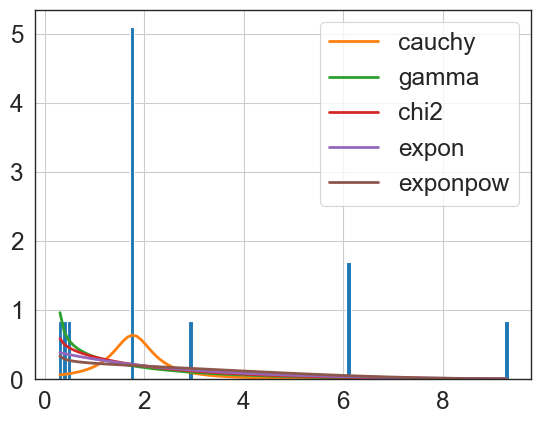

In [110]:
f_70 = Fitter(dec_70,
           distributions= get_common_distributions())
f_70.fit()
f_70.summary()

## For Category 80

In [111]:
dec_80 = df_80["Percent_Change"].values

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
exponpow,2.599026,928.997120,927.825433,inf,0.441955,0.210226
powerlaw,2.609012,909.931764,908.760077,inf,0.574796,0.042763
lognorm,2.658299,1020.769582,1019.597895,inf,0.586952,0.036164
gamma,2.793901,845.728108,844.556422,inf,0.316283,0.599657
chi2,2.884471,862.796587,861.624901,inf,0.311305,0.619342


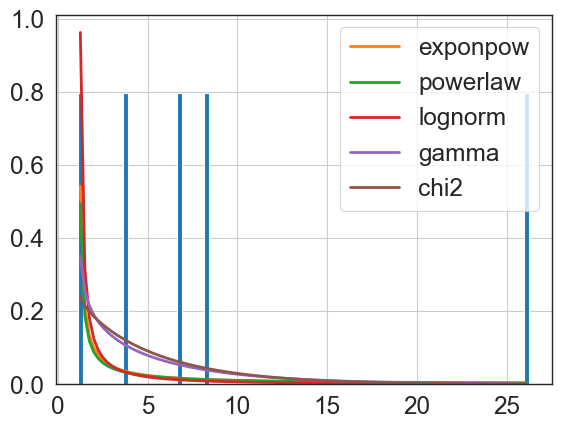

In [112]:
f_80 = Fitter(dec_80,
           distributions= get_common_distributions())
f_80.fit()
f_80.summary()

## Most categories follow Exponential Distributions